
**Continuous Skip-Gram Implementation (Error-Driven Directional Semantic Memory)**

Importing the neccessary libraries and the Dataset

In [1]:
!pip install pandas
!pip install nltk
!pip install matplotlib
!pip install gensim
!pip install sklearn.decomposition

ERROR: Could not find a version that satisfies the requirement sklearn.decomposition (from versions: none)
ERROR: No matching distribution found for sklearn.decomposition


In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

PATH = 'data/shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')

lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shivansh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shivansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing all the Data

In [4]:

# remove new lines
lines = [line.rstrip('\n') for line in lines]

# make all characters lower
lines = [line.lower() for line in lines]

# remove punctuations from each line
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

# tokenize
lines = [word_tokenize(line) for line in lines]

def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of 
    lines.
    
    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove
        
    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''
    
    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res
    
filtered_lines = remove_stopwords(lines = lines, sw = sw)

Embedding

In [5]:
w = w2v(
    filtered_lines,
    min_count=3,  
    sg = 1,       
    window=7      
)       

print(w.wv.most_similar('moon'))

emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df

[('shine', 0.9656789898872375), ('faults', 0.9656579494476318), ('oaths', 0.9642743468284607), ('double', 0.9642242193222046), ('turns', 0.9641779661178589), ('faces', 0.9637852311134338), ('woe', 0.9626417756080627), ('gifts', 0.9611388444900513), ('sees', 0.9607154726982117), ('deadly', 0.9594695568084717)]
(11628, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,-0.010881,-0.084764,0.652880,0.844450,-0.532000,-0.512086,0.406285,0.345568,-0.269997,-0.260838,...,0.107699,-0.054636,0.358795,0.222361,1.042957,0.694215,-0.731565,-0.276624,0.108717,0.511941
thy,-0.159545,0.478047,0.428674,0.298495,0.229384,-0.162238,0.247845,0.567752,-0.054420,-0.387424,...,0.076737,-0.227163,0.474481,-0.204697,0.325371,0.353145,-0.115634,-0.213151,0.106818,0.194071
shall,0.042659,0.140650,-0.128428,0.026639,0.530867,-0.032263,0.123813,0.273399,-0.181051,0.096815,...,0.496018,0.184314,0.069795,-0.059667,0.670776,0.379995,0.242646,-0.065300,0.355696,0.175981
thee,-0.438022,0.428409,0.237741,0.463605,-0.055820,-0.221711,0.259195,0.280344,-0.053661,-0.281449,...,0.253883,-0.068495,0.139038,0.031569,0.668399,0.352839,0.003467,0.049278,0.422964,0.030788
good,-0.135881,0.161933,0.210352,-0.296496,0.207483,0.297964,0.357137,0.836861,-0.255173,0.152970,...,0.382528,-0.272213,0.285212,-0.106174,0.377085,-0.085086,0.004357,0.008983,0.469150,-0.145230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
moralize,-0.024041,0.030353,0.012796,-0.031795,0.014019,-0.041360,0.056317,0.143990,-0.042588,-0.011579,...,0.088749,0.008263,0.036502,0.025520,0.092404,0.086702,0.004395,-0.069131,0.062059,0.011782
oerheard,-0.011113,0.036297,0.024034,-0.023614,-0.003266,-0.047619,0.044699,0.112826,-0.028503,-0.014562,...,0.070020,0.013857,0.055094,0.020239,0.079996,0.078123,0.009223,-0.070296,0.068837,-0.018955
bisson,-0.035924,0.046062,0.035894,-0.011316,0.005594,-0.046783,0.076391,0.155438,-0.066216,-0.016763,...,0.120321,0.023309,0.074477,0.044547,0.128723,0.109018,0.021935,-0.084539,0.074662,0.002159
colic,-0.027305,0.045548,0.015570,-0.015948,0.013073,-0.039754,0.054911,0.134962,-0.053813,-0.003461,...,0.084881,0.005210,0.049309,0.031801,0.101991,0.095720,0.011023,-0.074396,0.064633,-0.003467


PCA on Embeddings

[]

<Figure size 640x480 with 0 Axes>

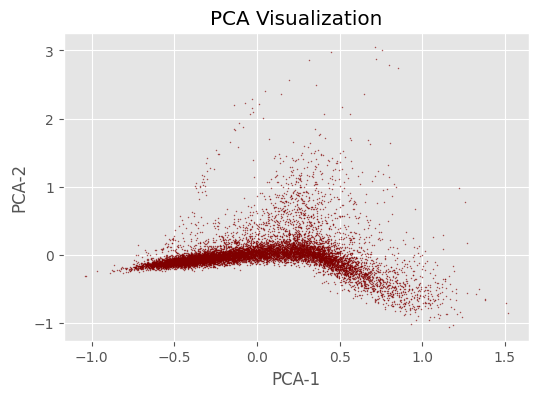

In [6]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()